# INTRODUCTION
For our project, we wanted to find the best neighborhood to raise a family in. For this, we wanted a safe neighborhood, that had a high average income, as well as good cell coverage, so you can always reach your children.
For these metrics, we used the police incident blotter dataset, the cell towers dataset, and the income dataset, as well as a population per neighborhood dataset.

#### Mason Huntington - Police Incidents Per Capita
To be a good neighborhood to raise a family in, the neighborhood must be safe. Because of this, I chose to use the police incidents blotter dataset, along with a population per neighborhood dataset.

In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#### First, I loaded both datasets, and sorted them by descending values.

In [2]:
population = pd.read_csv("neighborhood_populations.csv")
population_by_hood = population.groupby("Neighborhood").sum()['2020_Total_Population']
population_by_hood.sort_values(ascending=False)

Neighborhood
Shadyside              15317
Squirrel Hill South    15317
Brookline              13063
Squirrel Hill North    11879
North Oakland          10691
                       ...  
North Shore              301
West End                 205
St. Clair                183
South Shore               29
Chateau                   19
Name: 2020_Total_Population, Length: 89, dtype: int64

In [3]:
incidents = pd.read_csv("police_incidents.csv")
num_incidents = incidents['INCIDENTNEIGHBORHOOD'].value_counts()
num_incidents.sort_values(ascending=False)

South Side Flats             15858
Central Business District    14559
Carrick                       9725
Bloomfield                    7393
Shadyside                     7116
                             ...  
Outside State                  262
Troy Hill-Herrs Island         252
Outside County                 189
Mt. Oliver Neighborhood        117
Mt. Oliver Boro                 86
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

#### I then loaded both of these datasets into a new dataframe, with the index being the neighborhood name, and both columns being the number of incidents and the population, respectively.

In [4]:
ipc_frame = {'Incidents': num_incidents, 'Population': population_by_hood}
incidents_per_capita = pd.DataFrame(ipc_frame)
incidents_per_capita.head()

,Incidents,Population
Allegheny Center,2978.0,1419.0
Allegheny West,944.0,540.0
Allentown,4415.0,2305.0
Arlington,1759.0,NaN
Arlington - Arlington Heights (Combined),NaN,2040.0


#### In order to get the police incidents per capita, I then added another column being the incidents divided by the population of each neighborhood. This dataset had a few outliers, as well as a few non-number values, so I cleaned the dataset, removing any non-number values, and any incidents per capita value greater than 5.

In [5]:
incidents_per_capita["Incidents Per Capita"] = incidents_per_capita["Incidents"]/incidents_per_capita["Population"]
incidents_per_capita.drop(incidents_per_capita[incidents_per_capita['Incidents Per Capita'] > 5].index, inplace = True)
incidents_per_capita = incidents_per_capita[incidents_per_capita['Incidents Per Capita'].notna()]
incidents_per_capita.sort_values('Incidents Per Capita', ascending=False)

,Incidents,Population,Incidents Per Capita
West End,1009.0,205.0,4.921951
Homewood West,2383.0,642.0,3.711838
St. Clair,610.0,183.0,3.333333
Homewood South,6088.0,2260.0,2.693805
East Allegheny,4872.0,1903.0,2.560168
...,...,...,...
Stanton Heights,1552.0,4427.0,0.350576
New Homestead,290.0,917.0,0.316249
Squirrel Hill North,3400.0,11879.0,0.286219
Swisshelm Park,369.0,1339.0,0.275579


#### Finally, I was able to plot this data to a bar graph.
#### This showed that the top three safest neighborhoods (having the least incidents per capita) were Central Northside, Swisshelm Park, and Squirrel Hill North.

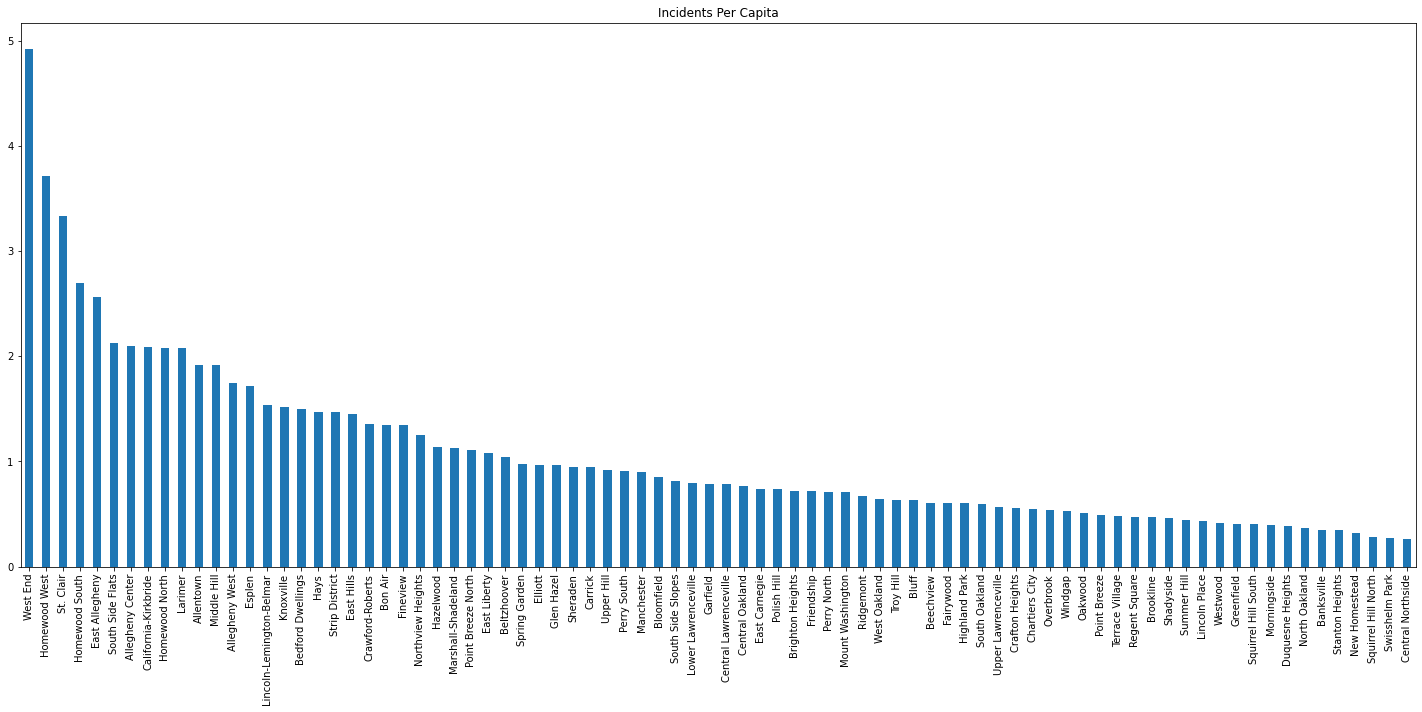

In [6]:
incidents_per_capita.sort_values('Incidents Per Capita', ascending=False)['Incidents Per Capita'].plot.bar(title='Incidents Per Capita', figsize=(25,10))

#### Nick -- Cell Towers

Cellular connections have become more and more important to family life. As parents get busy and their children grow older, they are doing more and more work remotely and taking more and more calls while driving kids to school or other activities.

Another important function of cellular towers is to allow parents to ensure their kids can always contact them. The average age kids get their first phone has been steadily decreasing. An increasing number of venues and activities require the use of an internet-connected phone. It's also an important safety feature, both in terms of kids being able to contact authorities and contact one's parents when they begin to spend time alone or at friends' houses.

Together, this means the density of cell phone towers is an important metric for the suitability of a family to be raised in a neighborhood.

In [7]:
import pandas as pd

towers = pd.read_csv("cell_towers.csv")
towers = towers["MUNICODE"].value_counts()
towers.head()

934    14
925    10
880    10
940     8
939     6
Name: MUNICODE, dtype: int64

The cell towers data set does not provide what neighborhood a cell tower is in. Instead, it provides a municipality code, which can be used to determine the neighborhood via the municipality dataset.

In [8]:
municipalities = pd.read_csv("municipalities.csv")[["NAME", "MUNICODE", "ACRES"]]
municipalities.head()

,NAME,MUNICODE,ACRES
0,CHESWICK,815,350.191284
1,EDGEWORTH,824,1030.743774
2,SEWICKLEY,851,718.309570
3,SEWICKLEY HEIGHTS,869,4738.989746
4,HARMAR,915,4060.858643


Finally, we can combine the two datasets:

In [9]:
municipalities["N_TOWERS"] = municipalities.MUNICODE.apply(lambda x: towers[x] if x in towers else 0)
municipalities.sort_values('N_TOWERS', ascending=False).head()

,NAME,MUNICODE,ACRES,N_TOWERS
120,PENN HILLS,934,12455.728516,14
96,MOON,925,15352.370117,10
30,PLUM,880,18545.425781,10
38,ROSS,940,9257.419922,8
109,HAMPTON,914,10367.599609,6


In [10]:
municipalities["DENSITY"] = municipalities.N_TOWERS/municipalities.ACRES
municipalities.sort_values('DENSITY', ascending=False).head()

,NAME,MUNICODE,ACRES,N_TOWERS,DENSITY
23,MILLVALE,838,441.883026,2,0.004526
70,WEST MIFFLIN,870,1510.908081,6,0.003971
42,ETNA,827,505.648651,2,0.003955
18,TARENTUM,855,903.488770,3,0.003320
31,BRADDOCK HILLS,872,603.870605,2,0.003312


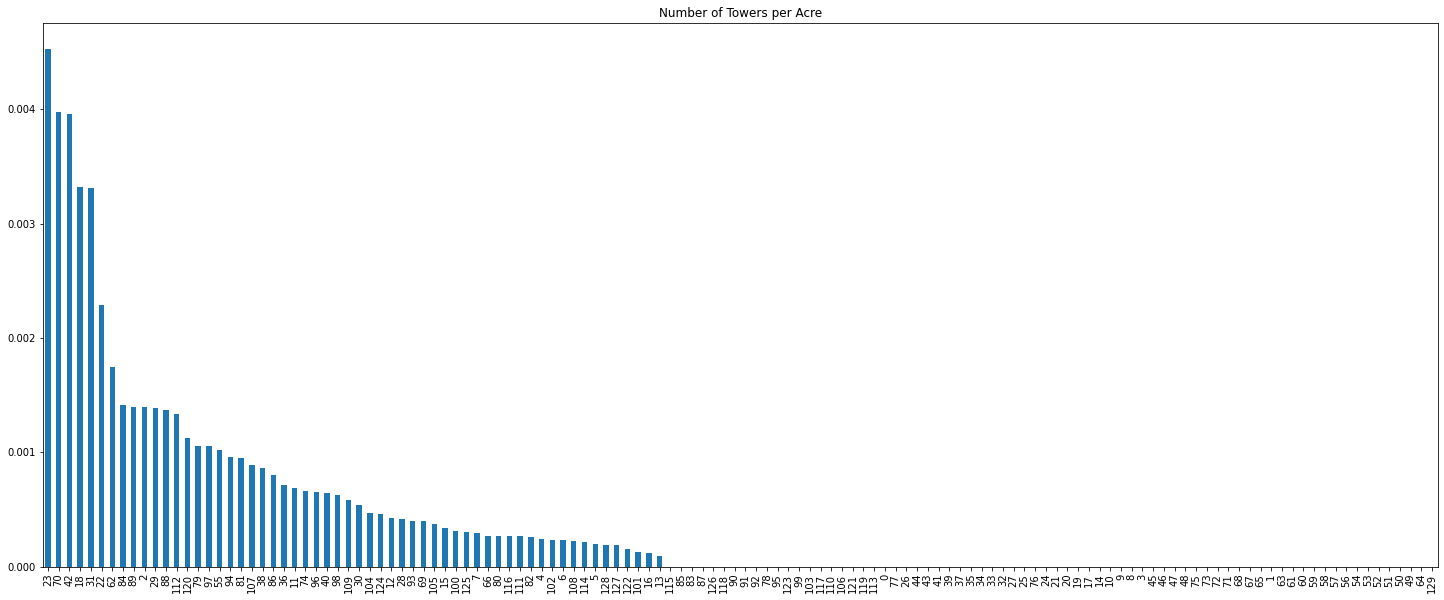

In [11]:
municipalities.sort_values('DENSITY', ascending=False)['DENSITY'].plot.bar(title='Number of Towers per Acre', figsize=(25,10))

#### Caroline Scalf - Playgrounds by Neighborhood
Playgrounds are an important aspect of healthy development for children. They promote exercise and encourage children to have fun. To determine the best neighborhood in this regard, I looked at the amount of parks per neighborhood. I figured that, since playgrounds are so important, the best neighborhood would have the most playgrounds.

To start, I found a data set from WPRDC that details each playground and which neighborhood it came from.

In [2]:
import pandas as pd
playground = pd.read_csv('playgrounds.csv')[["name","neighborhood"]]
playground.head(20)

,name,neighborhood
0,Able Long Playground,Beechview
1,Albert Graham Playground,Crawford-Roberts
2,Alpine Playground,Central Northside
3,Alton Playground,Beechview
4,Ammon Playground,Bedford Dwellings
5,Arlington Playground,South Side Slopes
6,Armstrong Playground,South Side Flats
7,Arsenal Playground,Lower Lawrenceville
8,August WIlson Playground,Crawford-Roberts
9,Banksville Playground,Banksville


First, I loaded in the data set for the playground information. The first 20 entries in the CSV file can be seen here. I sorted it just by name of the playground and neighborhood name, since that's what's important.

In [3]:
import pandas as pd
playground = pd.read_csv('playgrounds.csv')
playground["neighborhood"].unique()

array(['Beechview', 'Crawford-Roberts', 'Central Northside',
       'Bedford Dwellings', 'South Side Slopes', 'South Side Flats',
       'Lower Lawrenceville', 'Banksville', 'Homewood North', 'Bon Air',
       'Central Oakland', 'Brighton Heights', 'Brookline', 'Hazelwood',
       'Squirrel Hill South', 'Spring Garden', 'Lincoln-Lemington-Belmar',
       'Windgap', 'Troy Hill', 'Westwood', 'Perry South', 'Homewood West',
       'Allegheny Center', 'Strip District', 'Stanton Heights',
       'Crafton Heights', 'West Oakland', 'East Carnegie',
       'Duquesne Heights', 'East Liberty', 'Esplen', 'Fairywood',
       'Highland Park', 'Upper Lawrenceville', 'Fineview',
       'Regent Square', 'Garfield', 'Greenfield', 'South Oakland',
       'Allentown', 'Hays', 'Elliott', 'Morningside', 'Terrace Village',
       'Larimer', 'Carrick', 'Central Lawrenceville', 'Lincoln Place',
       'Manchester', 'Marshall-Shadeland', 'Sheraden', 'Beltzhoover',
       'Shadyside', 'Mount Washington', 'Oakwo

This shows me the amount of unique neighborhoods I'll be working with. This is important, since I need to filter out duplicates of neighborhoods.

In [6]:
playground["neighborhood"].value_counts()

Squirrel Hill South    8
Beechview              5
South Side Slopes      5
Highland Park          4
Sheraden               4
                      ..
Esplen                 1
Fairywood              1
Regent Square          1
Allentown              1
East Allegheny         1
Name: neighborhood, Length: 68, dtype: int64

Using the function value_counts(), I found the amount of times that each neighborhood was listed next to a park. This is extremely helpful, as it directly shows which neighborhoods have the most and least parks.
Now, we'll put this information into a bar graph!

Text(0.5, 1.0, 'Neighborhoods with the Most Parks')

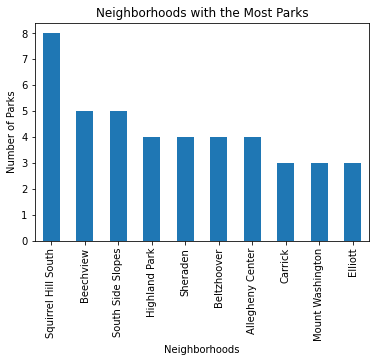

In [40]:
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt
play_graph = playground["neighborhood"].value_counts()
play_graph.head(10).plot(kind = 'bar')
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Parks")
plt.title("Neighborhoods with the Most Parks")

I set the graph to display the top 10 neighborhoods with the most parks. As you can see, Squirrel Hill South, Beechview, and South Side Slopes had the most parks.

Out of curiosity, I also decided to show the neighborhoods with the least amount of parks:

Text(0.5, 1.0, 'Neighborhoods with the Least Parks')

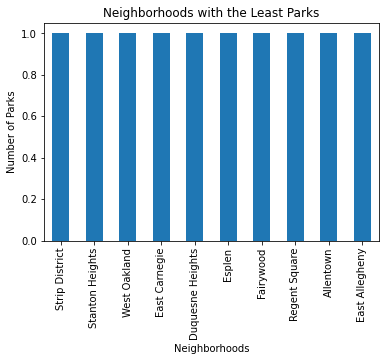

In [41]:
play_graph = playground["neighborhood"].value_counts()
play_graph.tail(10).plot(kind = 'bar')
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Parks")
plt.title("Neighborhoods with the Least Parks")

As you can see, places like the Strip District and Stanton Heights have the least amount of parks. These are likely more urban areas, which explains the lack of playgrounds. Still, it's interesting to keep in mind.

#### Conclusion
The thing that unites all of our metrics is convenience and safety. Playgrounds allow kids to exercise, which promotes good health. Having a lot of cell phone towers allows for people to call for help if necessary. Finally, having fewer police reports typically indicates a safer area. With all of these metrics in mind...

We've determined that Squirrel Hill South is the best neighborhood, with Squirrel Hill North a second close behind. Squirrel Hill South has the most playgrounds and a low amount of police reports, making it an ideal place to live. Those who want to raise a family can rely on Squirrel Hill South to be a safe place.

It's important to note that there are many different things to take into consideration when it comes to the best neighborhood. At the end of the day, this is just a small sample of information. Always come to your own conclusions about which neighborhood is the best!